In [1]:
import pandas as pd
import numpy as np

In [20]:
data = pd.read_csv("sp500_returns_with_tickers.csv", index_col="date")
len(data.columns)

936

In [21]:
cap_data = pd.read_csv("sp500_market_caps.csv", index_col="date")
cap_data.tail()

,JAVA,ORCL,MSFT,SDS,AYE,TROW,HON,EMC,BEAM,LLTC,...,CFN,AVGO,VRSK,DG.1,FTNT,VAL,GNRC,QEP,CBOE,TSLA
date,,,,,,,,,,,,,,,,,,,,,
2024-08-30,NaN,3.893754e+08,3.100618e+09,NaN,NaN,23604291.92,1.350731e+08,NaN,NaN,NaN,...,NaN,7.604632e+08,3.885612e+07,18246347.55,58676092.68,NaN,9415749.09,NaN,2.149182e+07,6.840044e+08
2024-09-30,NaN,4.721891e+08,3.199038e+09,NaN,NaN,24198036.99,1.344126e+08,NaN,NaN,NaN,...,NaN,8.056744e+08,3.788874e+07,18598211.55,59380035.00,NaN,9557108.64,NaN,2.143637e+07,8.390474e+08
2024-10-31,NaN,4.650952e+08,3.021164e+09,NaN,NaN,24406387.74,1.337428e+08,NaN,NaN,NaN,...,NaN,7.929237e+08,3.879349e+07,17601996.60,60229962.00,NaN,9958329.15,NaN,2.234668e+07,8.020335e+08
2024-11-29,NaN,5.122033e+08,3.148375e+09,NaN,NaN,27512170.56,1.514620e+08,NaN,NaN,NaN,...,NaN,7.595069e+08,4.154569e+07,16992832.05,72851357.65,NaN,11197335.40,NaN,2.259647e+07,1.107984e+09
2024-12-31,NaN,4.660847e+08,3.133802e+09,NaN,NaN,25123961.31,1.468843e+08,NaN,NaN,NaN,...,NaN,1.086402e+09,3.889374e+07,16674789.32,72414479.44,NaN,9225009.85,NaN,2.045564e+07,1.296351e+09


In [22]:
cap_data = cap_data * 1000
cap_data.tail()

,JAVA,ORCL,MSFT,SDS,AYE,TROW,HON,EMC,BEAM,LLTC,...,CFN,AVGO,VRSK,DG.1,FTNT,VAL,GNRC,QEP,CBOE,TSLA
date,,,,,,,,,,,,,,,,,,,,,
2024-08-30,NaN,3.893754e+11,3.100618e+12,NaN,NaN,2.360429e+10,1.350731e+11,NaN,NaN,NaN,...,NaN,7.604632e+11,3.885612e+10,1.824635e+10,5.867609e+10,NaN,9.415749e+09,NaN,2.149182e+10,6.840044e+11
2024-09-30,NaN,4.721891e+11,3.199038e+12,NaN,NaN,2.419804e+10,1.344126e+11,NaN,NaN,NaN,...,NaN,8.056744e+11,3.788874e+10,1.859821e+10,5.938004e+10,NaN,9.557109e+09,NaN,2.143637e+10,8.390474e+11
2024-10-31,NaN,4.650952e+11,3.021164e+12,NaN,NaN,2.440639e+10,1.337428e+11,NaN,NaN,NaN,...,NaN,7.929237e+11,3.879349e+10,1.760200e+10,6.022996e+10,NaN,9.958329e+09,NaN,2.234668e+10,8.020335e+11
2024-11-29,NaN,5.122033e+11,3.148375e+12,NaN,NaN,2.751217e+10,1.514620e+11,NaN,NaN,NaN,...,NaN,7.595069e+11,4.154569e+10,1.699283e+10,7.285136e+10,NaN,1.119734e+10,NaN,2.259647e+10,1.107984e+12
2024-12-31,NaN,4.660847e+11,3.133802e+12,NaN,NaN,2.512396e+10,1.468843e+11,NaN,NaN,NaN,...,NaN,1.086402e+12,3.889374e+10,1.667479e+10,7.241448e+10,NaN,9.225010e+09,NaN,2.045564e+10,1.296351e+12


In [23]:
cap_data_numeric = cap_data.apply(pd.to_numeric, errors='coerce')
cap_data_numeric = cap_data_numeric.fillna(0)
weight_data = cap_data_numeric.div(cap_data_numeric.sum(axis=1), axis=0)
row_sums = weight_data.sum(axis=1)
print(row_sums.head())
weight_data.tail()

date
2005-01-31    1.0
2005-02-28    1.0
2005-03-31    1.0
2005-04-29    1.0
2005-05-31    1.0
dtype: float64


,JAVA,ORCL,MSFT,SDS,AYE,TROW,HON,EMC,BEAM,LLTC,...,CFN,AVGO,VRSK,DG.1,FTNT,VAL,GNRC,QEP,CBOE,TSLA
date,,,,,,,,,,,,,,,,,,,,,
2024-08-30,0.0,0.007886,0.062798,0.0,0.0,0.000478,0.002736,0.0,0.0,0.0,...,0.0,0.015402,0.000787,0.000370,0.001188,0.0,0.000191,0.0,0.000435,0.013853
2024-09-30,0.0,0.009342,0.063290,0.0,0.0,0.000479,0.002659,0.0,0.0,0.0,...,0.0,0.015940,0.000750,0.000368,0.001175,0.0,0.000189,0.0,0.000424,0.016600
2024-10-31,0.0,0.009296,0.060384,0.0,0.0,0.000488,0.002673,0.0,0.0,0.0,...,0.0,0.015848,0.000775,0.000352,0.001204,0.0,0.000199,0.0,0.000447,0.016030
2024-11-29,0.0,0.009664,0.059402,0.0,0.0,0.000519,0.002858,0.0,0.0,0.0,...,0.0,0.014330,0.000784,0.000321,0.001375,0.0,0.000211,0.0,0.000426,0.020905
2024-12-31,0.0,0.008986,0.060421,0.0,0.0,0.000484,0.002832,0.0,0.0,0.0,...,0.0,0.020946,0.000750,0.000321,0.001396,0.0,0.000178,0.0,0.000394,0.024994


In [25]:
# (1) Make sure the columns match and are aligned:
data = data[weight_data.columns]

data_numeric = data.apply(pd.to_numeric, errors='coerce').fillna(0)

# Now compute returns:
sp500_returns = (data_numeric * weight_data).sum(axis=1)

sp500_returns

date
2005-01-31   -0.020418
2005-02-28    0.025947
2005-03-31   -0.014247
2005-04-29   -0.015218
2005-05-31    0.034786
                ...   
2024-08-30    0.028116
2024-09-30    0.025856
2024-10-31   -0.004786
2024-11-29    0.066461
2024-12-31   -0.015149
Length: 240, dtype: float64

In [28]:
active_mask = cap_data_numeric > 0

# Number of active stocks per month:
n_active_stocks = active_mask.sum(axis=1)

# Equal weight data:
equal_weight_data = active_mask.div(n_active_stocks, axis=0)

# Equal-weighted SP500 returns:
sp500_ew_returns = (data_numeric * equal_weight_data).sum(axis=1)

# Optional: Check
print(sp500_ew_returns.head())

            JAVA      ORCL      MSFT  SDS  AYE      TROW       HON  EMC  BEAM  \
date                                                                            
2024-08-30   0.0  0.001988  0.001988  0.0  0.0  0.001988  0.001988  0.0   0.0   
2024-09-30   0.0  0.001984  0.001984  0.0  0.0  0.001984  0.001984  0.0   0.0   
2024-10-31   0.0  0.001988  0.001988  0.0  0.0  0.001988  0.001988  0.0   0.0   
2024-11-29   0.0  0.001988  0.001988  0.0  0.0  0.001988  0.001988  0.0   0.0   
2024-12-31   0.0  0.001988  0.001988  0.0  0.0  0.001988  0.001988  0.0   0.0   

            LLTC  ...  CFN      AVGO      VRSK      DG.1      FTNT  VAL  \
date              ...                                                     
2024-08-30   0.0  ...  0.0  0.001988  0.001988  0.001988  0.001988  0.0   
2024-09-30   0.0  ...  0.0  0.001984  0.001984  0.001984  0.001984  0.0   
2024-10-31   0.0  ...  0.0  0.001988  0.001988  0.001988  0.001988  0.0   
2024-11-29   0.0  ...  0.0  0.001988  0.001988  0.001988 

In [30]:
innovation_returns = sp500_returns - sp500_ew_returns
innovation_weights = weight_data - equal_weight_data
innovation_weights.tail()

,JAVA,ORCL,MSFT,SDS,AYE,TROW,HON,EMC,BEAM,LLTC,...,CFN,AVGO,VRSK,DG.1,FTNT,VAL,GNRC,QEP,CBOE,TSLA
date,,,,,,,,,,,,,,,,,,,,,
2024-08-30,0.0,0.005898,0.060810,0.0,0.0,-0.001510,0.000748,0.0,0.0,0.0,...,0.0,0.013414,-0.001201,-0.001619,-0.000800,0.0,-0.001797,0.0,-0.001553,0.011865
2024-09-30,0.0,0.007358,0.061306,0.0,0.0,-0.001505,0.000675,0.0,0.0,0.0,...,0.0,0.013956,-0.001235,-0.001616,-0.000809,0.0,-0.001795,0.0,-0.001560,0.014616
2024-10-31,0.0,0.007308,0.058396,0.0,0.0,-0.001500,0.000685,0.0,0.0,0.0,...,0.0,0.013860,-0.001213,-0.001636,-0.000784,0.0,-0.001789,0.0,-0.001541,0.014042
2024-11-29,0.0,0.007676,0.057414,0.0,0.0,-0.001469,0.000870,0.0,0.0,0.0,...,0.0,0.012342,-0.001204,-0.001667,-0.000614,0.0,-0.001777,0.0,-0.001562,0.018917
2024-12-31,0.0,0.006998,0.058433,0.0,0.0,-0.001504,0.000844,0.0,0.0,0.0,...,0.0,0.018958,-0.001238,-0.001667,-0.000592,0.0,-0.001810,0.0,-0.001594,0.023006


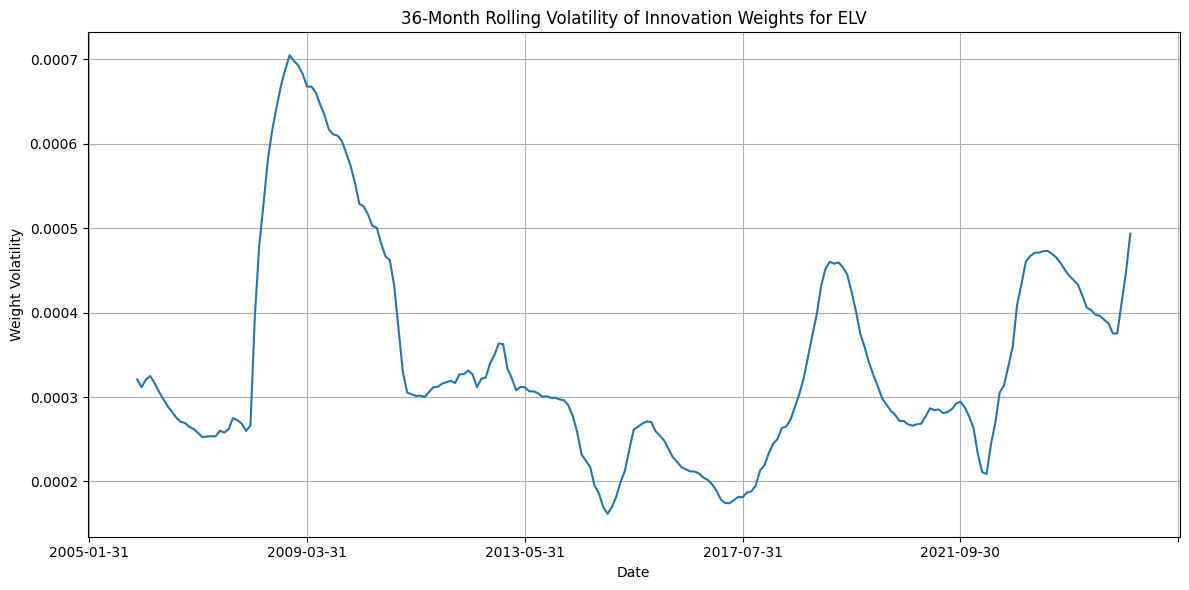

In [39]:
import matplotlib.pyplot as plt

# 1️⃣ You already have innovation_weights = weight_data - equal_weight_data

# 2️⃣ Mask out periods where stock is not in index (weight_data == 0 → stock not active)
# This step ensures that weights when stock is not in index (0 cap) are not affecting the rolling std
innovation_weights_masked = innovation_weights.where(weight_data > 0)

# 3️⃣ Compute 36-month rolling std of weights
rolling_weight_vol = innovation_weights_masked.rolling(window=36, min_periods=12).std()

# 4️⃣ Plot selected stocks
sample_stocks = ["ELV"]  # adjust to your tickers

for ticker in sample_stocks:
    rolling_weight_vol[ticker].plot(figsize=(12, 6), title=f'36-Month Rolling Volatility of Innovation Weights for {ticker}')
    plt.ylabel('Weight Volatility')
    plt.xlabel('Date')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
